## 1.读取数据

In [58]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
dataset = pd.read_csv('condata.csv')

In [59]:
dataset[0:10]

,Time,RawFeedRate,RawFeedspeed,PlantFeedMagneticsFeedRate,PlantFeedBinLevel1,PlantFeedBinLevel2,FeedRateCoarseGrindA,Pressure1A,Pressure2A,ForceA,...,CycloneFeeddensityB,CyclonepressureB,Pump1,Pump2,TimeTrain1On,TimeTrain2On,si_in,mg_in,si,mg
0,17552088,376.739777,45.926070,144.172961,77.460194,76.341110,868.141532,95.681504,102.939166,2.298568,...,1480.108623,199.862709,31.339054,0.0,3600.000000,3600.0,1.84,0.39,4.315,1.150
1,17552089,389.991035,57.530005,144.052475,78.064503,76.989966,864.061945,96.196410,96.337790,2.228090,...,1474.484637,204.605833,28.961263,0.0,3600.000000,3600.0,NaN,NaN,NaN,NaN
2,17552090,381.012892,49.410400,152.334158,78.196391,77.018878,855.667489,96.276785,91.346027,2.171241,...,1476.202156,205.015003,30.008605,0.0,3600.000000,3600.0,NaN,NaN,4.600,1.055
3,17552091,369.036126,47.137838,138.132510,81.576157,81.353751,561.981563,96.325033,86.469377,2.115343,...,1437.549611,198.215574,23.048106,0.0,2248.286102,3600.0,NaN,NaN,NaN,NaN
4,17552092,370.160631,51.130326,146.087278,81.249583,82.165118,849.525013,96.604596,86.425000,2.118080,...,1475.668763,205.382721,30.616016,0.0,3600.000000,3600.0,NaN,NaN,4.855,1.125
5,17552093,360.835898,50.233326,143.748449,80.895769,80.744470,818.868962,96.429887,84.920834,2.098618,...,1479.746230,205.740914,33.805314,0.0,3473.572479,3600.0,NaN,NaN,NaN,NaN
6,17552094,357.747529,46.523424,144.122285,81.141778,80.313134,820.553993,96.636627,83.776183,2.087785,...,1472.129313,204.708251,33.155244,0.0,3600.000000,3600.0,NaN,NaN,4.485,1.055
7,17552095,362.058600,40.699412,145.945048,80.779376,80.160180,822.781223,97.127726,83.964505,2.095712,...,1467.726185,204.369764,33.258285,0.0,3600.000000,3600.0,NaN,NaN,NaN,NaN
8,17552096,363.782476,40.215017,142.753819,80.703950,80.077102,825.258788,96.737837,83.999797,2.091659,...,1466.120381,203.933213,30.312733,0.0,3600.000000,3600.0,NaN,NaN,4.645,1.050
9,17552097,362.802525,40.284321,145.419722,80.753118,80.297978,820.565774,96.982830,84.422539,2.099248,...,1464.397957,203.591340,30.012942,0.0,3600.000000,3600.0,NaN,NaN,NaN,NaN


In [60]:
dataset=dataset.drop(['Time'], axis=1)#去除Time属性

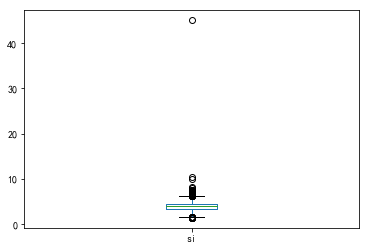

In [61]:
dataset['si'].plot(kind = 'box')

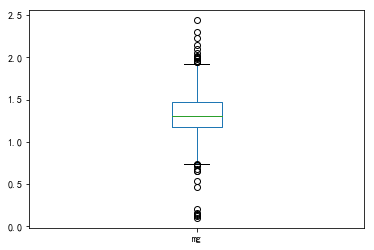

In [62]:
dataset['mg'].plot(kind = 'box')

去除异常值

In [63]:
def outlier_test(data,column, method=None, z=2):
        print(f'以 {column} 列为依据，使用 上下截断点法(iqr) 检测异常值...')
        print('=' * 70)
        # 四分位点；这里调用函数会存在异常
        column_iqr = np.quantile(data[column], 0.75) - np.quantile(data[column], 0.25)
        # 1，3 分位数
        (q1, q3) = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
        # 计算上下截断点
        upper, lower = (q3 + 1.5 * column_iqr), (q1 - 1.5 * column_iqr)
        # 检测异常值
        outlier = data[(data[column] <= lower) | (data[column] >= upper)]
        print(f'第一分位数: {q1}, 第三分位数：{q3}, 四分位极差：{column_iqr}')
        print(f"上截断点：{upper}, 下截断点：{lower}")
        return outlier, upper, lower

In [64]:
def outlier_test(data,column, method='z',z=2):
        print(f'以 {column} 列为依据，使用 Z 分数法，z 分位数取 {z} 来检测异常值...')
        print('=' * 70)
        # 计算两个 Z 分数的数值点
        mean, std = np.mean(data[column]), np.std(data[column])
        upper, lower = (mean + z * std), (mean - z * std)
        print(f"取 {z} 个 Z分数：大于 {upper} 或小于 {lower} 的即可被视为异常值。")
        print('=' * 70)
        # 检测异常值
        outlier = data[(data[column] <= lower) | (data[column] >= upper)]
        return outlier, upper, lower

In [65]:
outlier, upper, lower = outlier_test(data=dataset, column='si',method=None)#获得异常数据
outlier.info(); outlier.sample(5)
dataset.drop(index=outlier.index, inplace=True)#丢弃异常数据

以 si 列为依据，使用 Z 分数法，z 分位数取 2 来检测异常值...
取 2 个 Z分数：大于 6.12549760505901 或小于 1.7953419444687202 的即可被视为异常值。
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 474 to 9355
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RawFeedRate                     71 non-null     float64
 1   RawFeedspeed                    71 non-null     float64
 2   PlantFeedMagneticsFeedRate      71 non-null     float64
 3   PlantFeedBinLevel1              71 non-null     float64
 4   PlantFeedBinLevel2              71 non-null     float64
 5   FeedRateCoarseGrindA            71 non-null     float64
 6   Pressure1A                      71 non-null     float64
 7   Pressure2A                      71 non-null     float64
 8   ForceA                          71 non-null     float64
 9   Gap1A                           71 non-null     float64
 10  Gap2A                           71 non-null     float6

In [66]:
outlier, upper, lower = outlier_test(data=dataset, column='mg', method=None)#获得异常数据
outlier.info(); outlier.sample(5)
dataset.drop(index=outlier.index, inplace=True)#丢弃异常数据

以 mg 列为依据，使用 Z 分数法，z 分位数取 2 来检测异常值...
取 2 个 Z分数：大于 1.7597513160600888 或小于 0.8944703042304717 的即可被视为异常值。
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 24 to 9207
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RawFeedRate                     162 non-null    float64
 1   RawFeedspeed                    162 non-null    float64
 2   PlantFeedMagneticsFeedRate      162 non-null    float64
 3   PlantFeedBinLevel1              162 non-null    float64
 4   PlantFeedBinLevel2              162 non-null    float64
 5   FeedRateCoarseGrindA            162 non-null    float64
 6   Pressure1A                      162 non-null    float64
 7   Pressure2A                      162 non-null    float64
 8   ForceA                          162 non-null    float64
 9   Gap1A                           162 non-null    float64
 10  Gap2A                           162 non-null    floa

In [67]:
import matplotlib.pyplot as plt
Y_1 = dataset['si']#二氧化硅
Y_2 = dataset['mg']#氧化镁

C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


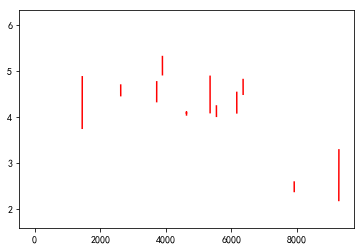

In [68]:
plt.plot(range(len(Y_1)),Y_1,'r')

## 2.插值处理

In [69]:
#dataset=dataset.interpolate(kind='cubic')
#dataset=dataset.interpolate(kind='quadratic')
dataset=dataset.interpolate(kind='linear')
dataset[0:10]

,RawFeedRate,RawFeedspeed,PlantFeedMagneticsFeedRate,PlantFeedBinLevel1,PlantFeedBinLevel2,FeedRateCoarseGrindA,Pressure1A,Pressure2A,ForceA,Gap1A,...,CycloneFeeddensityB,CyclonepressureB,Pump1,Pump2,TimeTrain1On,TimeTrain2On,si_in,mg_in,si,mg
0,376.739777,45.926070,144.172961,77.460194,76.341110,868.141532,95.681504,102.939166,2.298568,28.107068,...,1480.108623,199.862709,31.339054,0.0,3600.000000,3600.0,1.840000,0.390000,4.3150,1.1500
1,389.991035,57.530005,144.052475,78.064503,76.989966,864.061945,96.196410,96.337790,2.228090,27.895769,...,1474.484637,204.605833,28.961263,0.0,3600.000000,3600.0,1.912857,0.412857,4.4575,1.1025
2,381.012892,49.410400,152.334158,78.196391,77.018878,855.667489,96.276785,91.346027,2.171241,27.882728,...,1476.202156,205.015003,30.008605,0.0,3600.000000,3600.0,1.985714,0.435714,4.6000,1.0550
3,369.036126,47.137838,138.132510,81.576157,81.353751,561.981563,96.325033,86.469377,2.115343,29.855054,...,1437.549611,198.215574,23.048106,0.0,2248.286102,3600.0,2.058571,0.458571,4.7275,1.0900
4,370.160631,51.130326,146.087278,81.249583,82.165118,849.525013,96.604596,86.425000,2.118080,27.586406,...,1475.668763,205.382721,30.616016,0.0,3600.000000,3600.0,2.131429,0.481429,4.8550,1.1250
5,360.835898,50.233326,143.748449,80.895769,80.744470,818.868962,96.429887,84.920834,2.098618,27.943254,...,1479.746230,205.740914,33.805314,0.0,3473.572479,3600.0,2.204286,0.504286,4.6700,1.0900
6,357.747529,46.523424,144.122285,81.141778,80.313134,820.553993,96.636627,83.776183,2.087785,28.383645,...,1472.129313,204.708251,33.155244,0.0,3600.000000,3600.0,2.277143,0.527143,4.4850,1.0550
7,362.058600,40.699412,145.945048,80.779376,80.160180,822.781223,97.127726,83.964505,2.095712,28.396374,...,1467.726185,204.369764,33.258285,0.0,3600.000000,3600.0,2.350000,0.550000,4.5650,1.0525
8,363.782476,40.215017,142.753819,80.703950,80.077102,825.258788,96.737837,83.999797,2.091659,27.885184,...,1466.120381,203.933213,30.312733,0.0,3600.000000,3600.0,2.422857,0.572857,4.6450,1.0500
9,362.802525,40.284321,145.419722,80.753118,80.297978,820.565774,96.982830,84.422539,2.099248,27.654640,...,1464.397957,203.591340,30.012942,0.0,3600.000000,3600.0,2.495714,0.595714,4.6100,1.0275


异常值处理

# 特征缩放

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc = StandardScaler()

In [72]:
dataset =sc.fit_transform(dataset)

In [73]:
dataset[0:10]

array([[-7.20984274e-03, -4.16126701e-01,  8.08444833e-01,
         1.11902501e+00,  9.10061489e-01,  4.75002412e-01,
        -3.41388239e-02,  3.65333785e-01,  1.65925027e-01,
        -1.22442692e+00, -1.44476322e+00,  8.09312862e-02,
        -5.97045016e-01,  3.10264517e-01,  4.49786273e-01,
         2.41741453e-01,  3.91228986e-01,  1.17664997e+00,
         3.30417255e-01, -5.32590574e-01, -2.95334086e+00,
         4.50729862e-01,  5.66707594e-01,  3.13898554e-01,
         4.43573369e-01, -1.24936634e+00, -1.51956448e+00,
         3.09952805e-01, -5.40555796e-01,  4.10130552e-01,
         1.15565442e+00,  5.43566305e-01,  4.05659764e-01,
         6.46941779e-02,  0.00000000e+00, -5.16973438e-01,
        -3.88259236e+00,  1.17664997e+00, -2.24807821e-02,
        -2.15368382e-02,  1.49661706e-01,  1.02383825e-01,
        -6.43340546e-02,  6.46941779e-02, -2.24807821e-02,
         1.25124948e+00,  5.31191517e-01, -5.33072506e-02,
         1.27581559e-01, -6.76268092e-01, -4.45278359e-0

## 3.拆分测试集与训练集

In [77]:
import matplotlib.pyplot as plt
X = dataset[ : , 0:74]
Y_1 = dataset[ : , 74]#二氧化硅
Y_2 = dataset[ : , 75]#氧化镁

In [78]:
np.shape(X)

(9275, 74)

Text(0.5,0,'数据处理后')

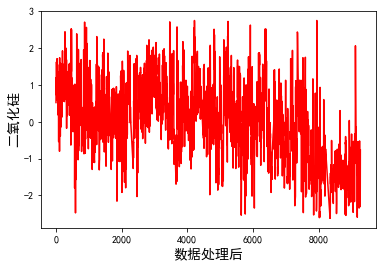

In [79]:
plt.plot(range(len(Y_1)),Y_1,'r')
plt.ylabel("二氧化硅", fontsize=14)
plt.xlabel("数据处理后" ,fontsize=14)

Text(0.5,0,'数据处理后')

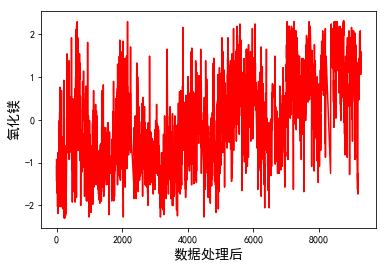

In [80]:
plt.plot(range(len(Y_2)),Y_2,'r')
plt.ylabel("氧化镁", fontsize=14)
plt.xlabel("数据处理后" ,fontsize=14)

In [81]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y_1, test_size = 0.2, random_state = 0)#二氧化硅
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y_2, test_size = 0.2, random_state = 0)#氧化镁

## 4.在训练集上训练多元线性回归模型

In [93]:
from sklearn.svm import SVR

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [95]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [109]:
linear_svr = SVR(kernel='linear')#分别采用三种核函数对X1回归
linear_svr.fit(X1_train,Y1_train)
linear_svr_y_predict = linear_svr.predict(X1_test)
r1=linear_svr.score(X1_test,Y1_test)
print ('R^2 of linear SVR is',r1)
poly_svr = SVR(kernel='poly')
poly_svr.fit(X1_train,Y1_train)
poly_svr_y_predict = poly_svr.predict(X1_test)
r2=poly_svr.score(X1_test,Y1_test)
print ('R^2 of poly SVR is',r2)
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X1_train,Y1_train)
rbf_svr_y1_predict = rbf_svr.predict(X1_test)
r3=rbf_svr.score(X1_test,Y1_test)
print ('R^2 of rbf SVR is',r3)

R^2 of linear SVR is 0.6231979216801676
R^2 of poly SVR is 0.6589517065353256
R^2 of rbf SVR is 0.7496209203113364


In [110]:
print('高斯核函数支持向量机的平均绝对误差为:',mean_absolute_error(Y1_test,rbf_svr_y1_predict))
print('高斯核函数支持向量机的均方误差为:',mean_squared_error(Y1_test,rbf_svr_y1_predict))
print('线性核函数支持向量机的平均绝对误差为:',mean_absolute_error(Y1_test,linear_svr_y_predict))
print('线性核函数支持向量机的均方误差为:', mean_squared_error(Y1_test,linear_svr_y_predict))
print('多项式核函数支持向量机的平均绝对误差为:', mean_absolute_error(Y1_test,poly_svr_y_predict))
print('多项式核函数支持向量机的均方误差为:',mean_absolute_error(Y1_test,poly_svr_y_predict))

高斯核函数支持向量机的平均绝对误差为: 0.36939685035374686
高斯核函数支持向量机的均方误差为: 0.2634789751856374
线性核函数支持向量机的平均绝对误差为: 0.4760600507163618
线性核函数支持向量机的均方误差为: 0.39651645643468975
多项式核函数支持向量机的平均绝对误差为: 0.43391566666398446
多项式核函数支持向量机的均方误差为: 0.43391566666398446


In [111]:
linear_svr = SVR(kernel='linear')#分别采用三种核函数对X2回归
linear_svr.fit(X2_train,Y2_train)
linear_svr_y_predict = linear_svr.predict(X2_test)
r4=linear_svr.score(X2_test,Y2_test)
print ('R^2 of linear SVR is',r4)
poly_svr = SVR(kernel='poly')
poly_svr.fit(X2_train,Y2_train)
poly_svr_y_predict = poly_svr.predict(X2_test)
r5=poly_svr.score(X2_test,Y2_test)
print ('R^2 of poly SVR is',r5)
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X2_train,Y2_train)
rbf_svr_y2_predict = rbf_svr.predict(X2_test)
r6=rbf_svr.score(X2_test,Y2_test)
print ('R^2 of rbf SVR is',r6)

R^2 of linear SVR is 0.5679425911057161
R^2 of poly SVR is 0.660523558775121
R^2 of rbf SVR is 0.7350711833440203


In [104]:
print('高斯核函数支持向量机的平均绝对误差为:',mean_absolute_error(Y2_test,rbf_svr_y2_predict))
print('高斯核函数支持向量机的均方误差为:',mean_squared_error(Y2_test,rbf_svr_y2_predict))
print('线性核函数支持向量机的平均绝对误差为:',mean_absolute_error(Y2_test,linear_svr_y_predict))
print('线性核函数支持向量机的均方误差为:', mean_squared_error(Y2_test,linear_svr_y_predict))
print('多项式核函数支持向量机的平均绝对误差为:', mean_absolute_error(Y2_test,poly_svr_y_predict))
print('多项式核函数支持向量机的均方误差为:',mean_absolute_error(Y2_test,poly_svr_y_predict))

高斯核函数支持向量机的平均绝对误差为: 0.377969510958745
高斯核函数支持向量机的均方误差为: 0.26878497147622993
线性核函数支持向量机的平均绝对误差为: 0.5097037257252284
线性核函数支持向量机的均方误差为: 0.43834619348541415
多项式核函数支持向量机的平均绝对误差为: 0.43865739464006304
多项式核函数支持向量机的均方误差为: 0.43865739464006304


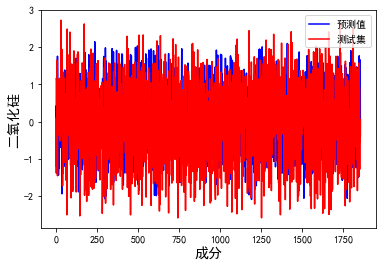

In [105]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['Simhei']  
plt.rcParams['axes.unicode_minus']=False  
plt.plot(range(len(rbf_svr_y1_predict)),rbf_svr_y1_predict,'b-',label="预测值")  
plt.plot(range(len(Y1_test)),Y1_test,'r',label="测试集")
plt.legend()  # 让图例生效
plt.xlabel("成分", fontsize=14)  # 指定X坐标轴的标签，并设置标签字体大小
plt.ylabel("二氧化硅", fontsize=14)  # 指定Y坐标轴的标签，并设置标签字体大小
plt.show() 

<function matplotlib.pyplot.show(*args, **kw)>

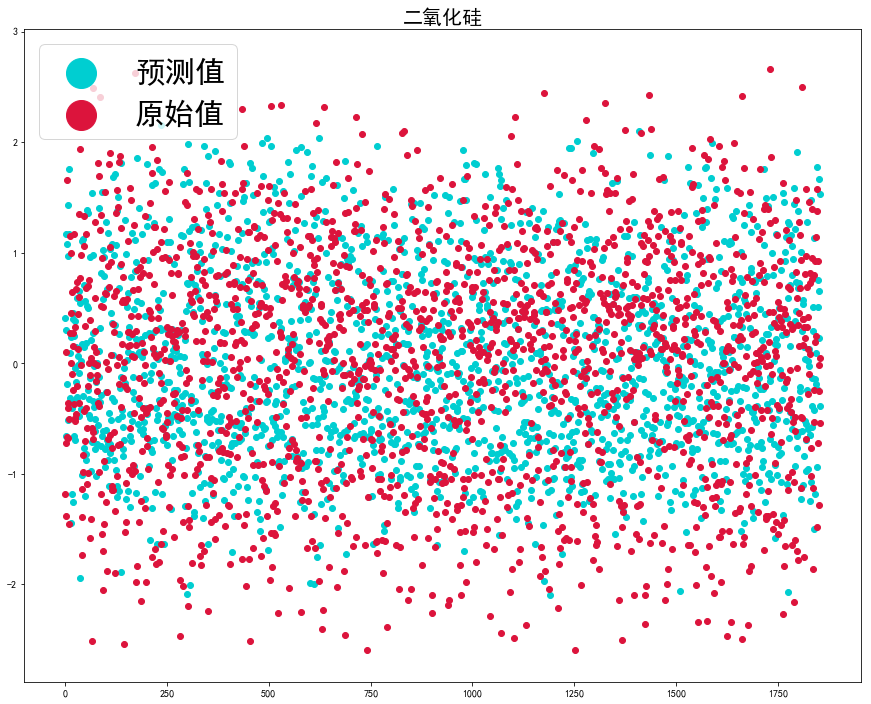

In [115]:
plt.figure(figsize=(15,12))
plt.scatter(range(len(rbf_svr_y_predict)),rbf_svr_y_predict,label='预测值',color='#00CED1')
plt.scatter(range(len(Y1_test)),Y1_test,label='原始值',color='#DC143C')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(markerscale=5,fontsize=30)
plt.title('二氧化硅',fontsize=20)
plt.show

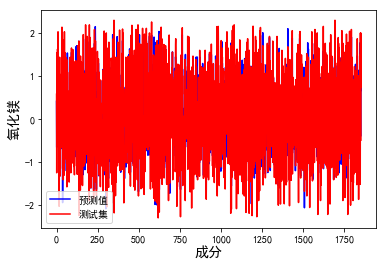

In [116]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['Simhei']  
plt.rcParams['axes.unicode_minus']=False  
plt.plot(range(len(rbf_svr_y2_predict)),rbf_svr_y2_predict,'b-',label="预测值")  
plt.plot(range(len(Y2_test)),Y2_test,'r',label="测试集")
plt.legend()  # 让图例生效
plt.xlabel("成分", fontsize=14)  # 指定X坐标轴的标签，并设置标签字体大小
plt.ylabel("氧化镁", fontsize=14)  # 指定Y坐标轴的标签，并设置标签字体大小
plt.show() 

<function matplotlib.pyplot.show(*args, **kw)>

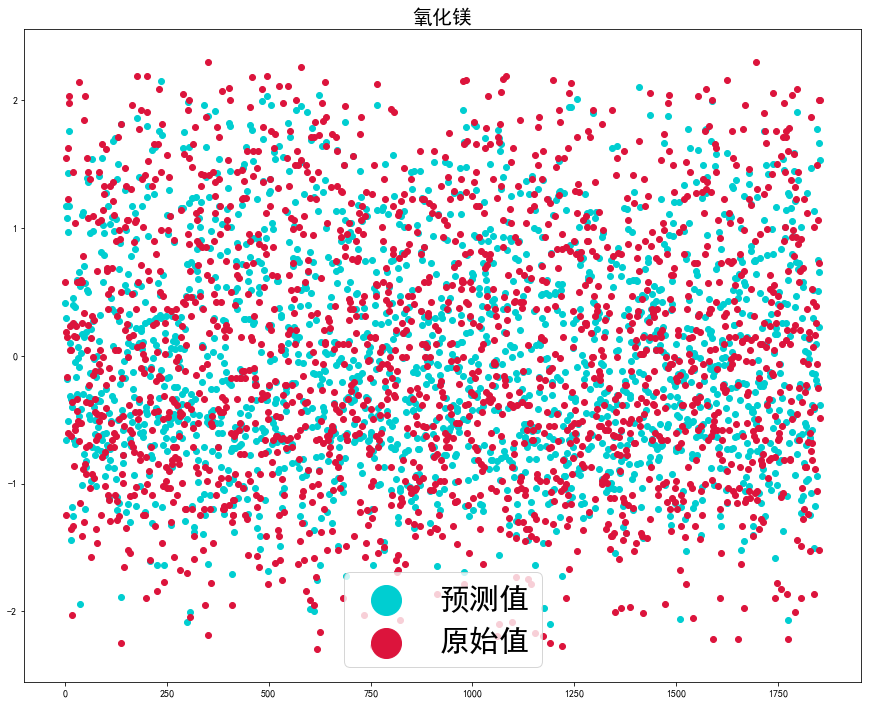

In [118]:
plt.figure(figsize=(15,12))
plt.scatter(range(len(rbf_svr_y2_predict)),rbf_svr_y2_predict,label='预测值',color='#00CED1')
plt.scatter(range(len(Y2_test)),Y2_test,label='原始值',color='#DC143C')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(markerscale=5,fontsize=30)
plt.title('氧化镁',fontsize=20)
plt.show